# SMOTE

Best Solution
 https://colab.research.google.com/drive/1PqmwEmFzvhhq4bjUzRk3fx4iWDwBrE-F?usp=sharing#scrollTo=fDuA_Lx7Jrr8

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('train_yaOffsB.csv')

In [3]:
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [16]:
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
z=df.copy()

In [6]:
df['Number_Weeks_Used'].describe()

count    79858.000000
mean        28.623970
std         12.391881
min          0.000000
25%         20.000000
50%         28.000000
75%         37.000000
max         67.000000
Name: Number_Weeks_Used, dtype: float64

In [7]:
#Using Mice
from impyute.imputation.cs import mice
x=z.drop(['ID'],axis=1)
imputed=mice(x.values)
mice_data=imputed.copy()

In [8]:
new_df=pd.DataFrame(mice_data,columns=['Estimated_Insects_Count' ,'Crop_Type' ,	'Soil_Type' ,'Pesticide_Use_Category' ,'Number_Doses_Week' ,'Number_Weeks_Used' ,'Number_Weeks_Quit' ,'Season' ,'Crop_Damage'])

In [9]:
new_df.tail()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
88853,3337.0,1.0,0.0,2.0,10.0,12.0,44.0,3.0,0.0
88854,3516.0,1.0,0.0,2.0,10.0,20.0,38.0,1.0,0.0
88855,3516.0,1.0,0.0,2.0,15.0,40.0,8.0,2.0,0.0
88856,3702.0,1.0,0.0,2.0,10.0,25.0,18.0,3.0,0.0
88857,3895.0,1.0,0.0,2.0,20.0,37.0,7.0,3.0,0.0


In [10]:
new_df.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [29]:
new_df['Number_Weeks_Used'].describe()

count    88858.000000
mean        28.607462
std         12.133510
min          0.000000
25%         20.000000
50%         28.000000
75%         37.000000
max         67.000000
Name: Number_Weeks_Used, dtype: float64

so its look similar to above....i mean mean and all other things are same nothing change in statistical value

In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  88858 non-null  float64
 1   Crop_Type                88858 non-null  float64
 2   Soil_Type                88858 non-null  float64
 3   Pesticide_Use_Category   88858 non-null  float64
 4   Number_Doses_Week        88858 non-null  float64
 5   Number_Weeks_Used        88858 non-null  float64
 6   Number_Weeks_Quit        88858 non-null  float64
 7   Season                   88858 non-null  float64
 8   Crop_Damage              88858 non-null  float64
dtypes: float64(9)
memory usage: 6.1 MB


### Feature Selection

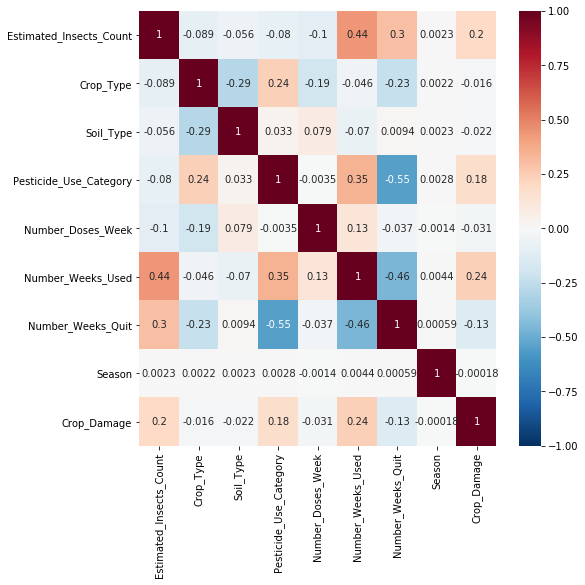

In [12]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(new_df.corr(), annot=True, cmap='RdBu_r', vmin=-1.0, vmax=1.0)

In [13]:
from sklearn.model_selection import train_test_split

In [88]:
x_train,x_test,y_train,y_test=train_test_split(new_df.drop('Crop_Damage',axis=1),new_df['Crop_Damage'],test_size=0.2)

In [89]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0, n_jobs=-1)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [90]:
clf.score(x_test,y_test)

0.8254557731262661

In [91]:
from xgboost import XGBClassifier

In [93]:
clf2=XGBClassifier()
clf2.fit(new_df.drop('Crop_Damage',axis=1),new_df['Crop_Damage'])
clf2.score(x_test,y_test)

0.8596106234526221

In [19]:
from sklearn.svm import SVC

In [20]:
clf3=SVC()
clf3.fit(x_train,y_train)
clf3.score(x_test,y_test)

0.8373846500112536

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
clf4=DecisionTreeClassifier()
clf4.fit(x_train,y_train)
clf4.score(x_test,y_test)

0.7464550979068197

In [29]:
feat_labels=['Estimated_Insects_Count' ,'Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit', 'Season']

In [30]:
# selecting feature using Randomforest
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('Estimated_Insects_Count', 0.296176079430072)
('Crop_Type', 0.011124382473506922)
('Soil_Type', 0.01466322739721984)
('Pesticide_Use_Category', 0.033552248717427804)
('Number_Doses_Week', 0.14393343776302342)
('Number_Weeks_Used', 0.321706728298073)
('Number_Weeks_Quit', 0.1382824349626499)
('Season', 0.04056146095802704)


In [31]:
# selecting feature using Xgboost
for feature in zip(feat_labels, clf2.feature_importances_):
    print(feature)

('Estimated_Insects_Count', 0.072387144)
('Crop_Type', 0.07278417)
('Soil_Type', 0.034263656)
('Pesticide_Use_Category', 0.5670889)
('Number_Doses_Week', 0.06734131)
('Number_Weeks_Used', 0.09486717)
('Number_Weeks_Quit', 0.06473543)
('Season', 0.026532207)


from above we can conclude that xgboost is best cause having higher score

### HyperParameter Tuning

In [99]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

 total number of combinations for the set of parameters above is a produc
t of options for each parameter (3 x 5 x 3 x 3 x 3 = 405). It also needs to
be multiplied by 5 to calculate a total number of data-fitting runs as we will be
doing 5-fold cross-validation. That gets to be a large number in a hurry if you are
using many parameters and lots of options, which is why brute-force grid search takes a long time.

Next we set up our classifier. We use sklearn's
API of XGBoost as that is a requirement for grid search
(another reason why Bayesian optimization may be preferable,
 as it does not need to be sklearn-wrapped). You should consider
setting a learning rate to smaller value (at least 0.01, if not even lower),
or make it a hyperparameter for grid searching. I am not using very small value here to save on running time

In [100]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

Note that I have set the number of splits/folds to 3 in order
to save time. You should probably put 5 there to get a more reliable result

In [106]:
X=new_df.drop('Crop_Damage',axis=1).copy()
Y=new_df['Crop_Damage'].copy()
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, 
                                   n_iter=param_comb, n_jobs=4,
                                   cv=skf.split(X,Y), verbose=3, random_state=1001 )

In [107]:
random_search.fit(X,Y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 22.0min finished


[15:22:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x00000242B5BFD138>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verbosity=None),
                   iid='deprecated', n_i

In [109]:
random_search.best_params_

{'subsample': 0.8,
 'min_child_weight': 5,
 'max_depth': 5,
 'gamma': 1,
 'colsample_bytree': 0.8}

In [115]:
xgb2=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bytree=0.8, gamma=1.5, learning_rate=0.05, max_delta_step=0, max_depth=3, min_child_weight=7, missing=None, n_estimators=200, n_jobs=-1, nthread=None, objective='binary:logistic', random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=0.6)

In [116]:
xgb2.fit(X,Y)

[15:45:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { scale_pos_weight, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=7, missing=None, monotone_constraints='()',
              n_estimators=200, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
              subsample=0.6, tree_method='exact', validate_parameters=1,
              verbosity=None)

## Test Data

In [14]:
df2=pd.read_csv('test_pFkWwen.csv')

In [15]:
df2.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [79]:
df2.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

In [80]:
## filling missing values
#Using Mice
z2=df2.copy()
from impyute.imputation.cs import mice
x2=z2.drop(['ID'],axis=1)
imputed2=mice(x2.values)
mice_data2=imputed2.copy()

In [81]:
new_df2=pd.DataFrame(mice_data2,columns=['Estimated_Insects_Count' ,'Crop_Type' ,	'Soil_Type' ,'Pesticide_Use_Category' ,'Number_Doses_Week' ,'Number_Weeks_Used' ,'Number_Weeks_Quit' ,'Season'])

In [82]:
new_df2.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [117]:
z=xgb2.predict(new_df2)

In [118]:
a=df2['ID'].copy()

In [119]:
a=pd.DataFrame(a,columns=['ID'])

In [120]:
a['Crop_Damage']=z

In [121]:
a.to_csv('Agriculture_predi.csv',index=False)